In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,precision_score,recall_score
from interpret.glassbox import ExplainableBoostingClassifier
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("pd_speech_features.csv")

In [12]:
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [13]:
X=df.drop(columns=['class'])

In [14]:
y=df['class']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
xgb=XGBClassifier()

In [17]:
xgb.fit(X_train,y_train)

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:20:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy:  0.868421052631579
F1 Score:  0.9152542372881356
Precision:  0.8503937007874016
Recall (Sensitivity):  0.9908256880733946


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

Specificity:  0.5581395348837209


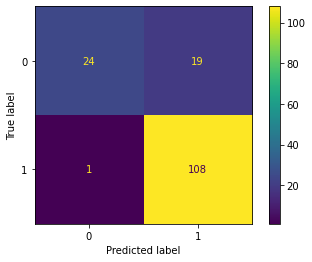

In [18]:
print("Accuracy: ",accuracy_score(y_test,xgb.predict(X_test)))
print("F1 Score: ",f1_score(y_test,xgb.predict(X_test)))
print("Precision: ",precision_score(y_test,xgb.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,xgb.predict(X_test)))


cm=confusion_matrix(y_test,xgb.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [19]:
rfr=RandomForestClassifier()

In [20]:
rfr.fit(X_train,y_train)

RandomForestClassifier()

Accuracy:  0.8421052631578947
F1 Score:  0.8983050847457626
Precision:  0.8346456692913385
Recall (Sensitivity):  0.9724770642201835


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Specificity:  0.5581395348837209


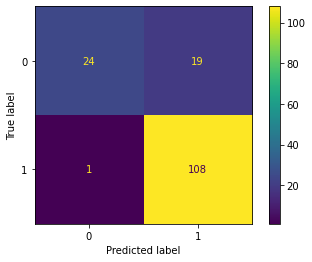

In [21]:
print("Accuracy: ",accuracy_score(y_test,rfr.predict(X_test)))
print("F1 Score: ",f1_score(y_test,rfr.predict(X_test)))
print("Precision: ",precision_score(y_test,rfr.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,rfr.predict(X_test)))


cm=confusion_matrix(y_test,xgb.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [ ]:
ebm=ExplainableBoostingClassifier()
ebm.fit(X_train,y_train)

print("Accuracy: ",accuracy_score(y_test,ebm.predict(X_test)))
print("F1 Score: ",f1_score(y_test,ebm.predict(X_test)))
print("Precision: ",precision_score(y_test,ebm.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,ebm.predict(X_test)))


cm=confusion_matrix(y_test,ebm.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [ ]:
ebm.explain_global()

In [ ]:
fic=list(rfr.feature_importances_)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar([i for i in range(len(df.columns)-1)],fic)

In [ ]:
len(fic)==len(df.columns)

In [ ]:
print('[',end='')
for i in range(len(fic)):
    if fic[i]>=0.0025:
        print(f"'{df.columns[i]}'",end=" ,")
print(']',end='')

In [ ]:
important=['id' ,'numPulses' ,'meanPeriodPulses' ,'locAbsJitter' ,'ppq5Jitter' ,'locDbShimmer' ,'apq11Shimmer' ,'meanHarmToNoiseHarmonicity' ,'minIntensity' ,'f1' ,'b1' ,'GQ_std_cycle_open' ,'mean_MFCC_2nd_coef' ,'mean_MFCC_8th_coef' ,'std_Log_energy' ,'std_delta_log_energy' ,'std_2nd_delta' ,'std_5th_delta' ,'std_6th_delta' ,'std_7th_delta' ,'std_8th_delta' ,'std_delta_delta_log_energy' ,'std_6th_delta_delta' ,'std_7th_delta_delta' ,'std_8th_delta_delta' ,'std_9th_delta_delta' ,'std_12th_delta_delta' ,'det_TKEO_mean_1_coef' ,'app_entropy_shannon_3_coef' ,'app_entropy_log_6_coef' ,'app_det_TKEO_mean_3_coef' ,'app_det_TKEO_mean_8_coef' ,'app_TKEO_std_5_coef' ,'det_LT_entropy_shannon_1_coef' ,'det_LT_entropy_shannon_3_coef' ,'det_LT_TKEO_std_4_coef' ,'app_LT_entropy_shannon_10_coef' ,'app_LT_entropy_log_9_coef' ,'app_LT_TKEO_mean_9_coef' ,'app_LT_TKEO_std_8_coef' ,'tqwt_energy_dec_6' ,'tqwt_energy_dec_11' ,'tqwt_energy_dec_12' ,'tqwt_energy_dec_19' ,'tqwt_energy_dec_26' ,'tqwt_energy_dec_27' ,'tqwt_energy_dec_34' ,'tqwt_entropy_shannon_dec_7' ,'tqwt_entropy_shannon_dec_8' ,'tqwt_entropy_shannon_dec_11' ,'tqwt_entropy_shannon_dec_12' ,'tqwt_entropy_shannon_dec_35' ,'tqwt_entropy_shannon_dec_36' ,'tqwt_entropy_log_dec_11' ,'tqwt_entropy_log_dec_12' ,'tqwt_entropy_log_dec_26' ,'tqwt_entropy_log_dec_27' ,'tqwt_entropy_log_dec_29' ,'tqwt_entropy_log_dec_33' ,'tqwt_entropy_log_dec_35' ,'tqwt_TKEO_mean_dec_6' ,'tqwt_TKEO_mean_dec_11' ,'tqwt_TKEO_mean_dec_12' ,'tqwt_TKEO_mean_dec_17' ,'tqwt_TKEO_mean_dec_18' ,'tqwt_TKEO_mean_dec_26' ,'tqwt_TKEO_mean_dec_32' ,'tqwt_TKEO_mean_dec_34' ,'tqwt_TKEO_mean_dec_35' ,'tqwt_TKEO_mean_dec_36' ,'tqwt_TKEO_std_dec_12' ,'tqwt_TKEO_std_dec_13' ,'tqwt_TKEO_std_dec_14' ,'tqwt_stdValue_dec_7' ,'tqwt_stdValue_dec_11' ,'tqwt_stdValue_dec_12' ,'tqwt_stdValue_dec_13' ,'tqwt_stdValue_dec_34' ,'tqwt_stdValue_dec_35' ,'tqwt_minValue_dec_7' ,'tqwt_minValue_dec_12' ,'tqwt_minValue_dec_18' ,'tqwt_maxValue_dec_12' ,'tqwt_maxValue_dec_13' ,'tqwt_kurtosisValue_dec_17' ,'tqwt_kurtosisValue_dec_20' ,'tqwt_kurtosisValue_dec_34']

In [ ]:
preprocessed=df.drop(columns=important)

In [ ]:
preprocessed

In [ ]:
X=preprocessed.drop(columns=['class'])
y=preprocessed['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_test

In [ ]:
rfr=RandomForestClassifier()
rfr.fit(X_train,y_train)

print("Accuracy: ",accuracy_score(y_test,rfr.predict(X_test)))
print("F1 Score: ",f1_score(y_test,rfr.predict(X_test)))
print("Precision: ",precision_score(y_test,rfr.predict(X_test)))
print("Recall (Sensistivity): ",recall_score(y_test,rfr.predict(X_test)))


cm=confusion_matrix(y_test,rfr.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
print("Sensitivity: ",tp/(tp+fn))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print("Accuracy: ",accuracy_score(y_test,xgb.predict(X_test)))
print("F1 Score: ",f1_score(y_test,xgb.predict(X_test)))
print("Precision: ",precision_score(y_test,xgb.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,xgb.predict(X_test)))


cm=confusion_matrix(y_test,xgb.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
